# Build a Multi Layer Perceptron

### At this point, you should have a firm grasp of the function of the component parts of neural networks such as tensors, loss functions, optimizers and what a model is in broad strokes. We are now going to move from a single layer model to a neural network with mutiple hidden layers called a multi layer perceptron (MLP).

### This notebook will, in all actuality, be extremely simple if you were diligent in the last one. The real fundamental change here is that we are adding multiple layers to our model now to make it a true neural network.

### In the single layer perceptron, we only had an input layer and an output layer. Now, we are going to introduce layers in between called hidden layers. What this does is it adds more weights (or parameters) to the network and will allow it to extract more information from the data. This, at the cost of training time, will greatly increase our model's ability on a wide range of tasks, and fortunately it is quite easy to code. Let's first take a look at the architecure of an MLP

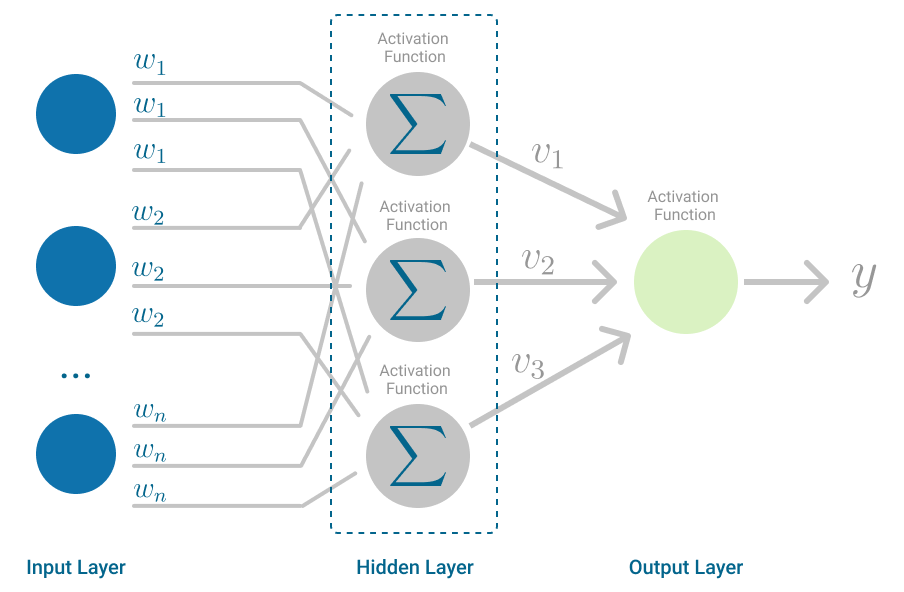

### Above is an image of a fully connected MLP binary classifier. What do these words mean
- #### **Fully connected**: all of the inputs have a connection to all of the hidden layers which all go to the output layer
- #### **MLP**: The presence of a hidden layer in the middle, by definition, makes this a multilayer perceptron (aka, neural network)
- #### **Binary**: Only a sinlge output node is only predicting one class

### You will also notice in the above image there are ReLU activation functions. What do these *really* do and why are they important.
### ReLU introduce non linearity into the neural network. Why is this good? Because if the the neural netork only has linear connections between nodes, it would just be a linear regression model. We want to extract complicated patterns out of data, and to do that we need our network to extract non linear features.

### This is relevant becuase real world data is not linear. On the breast dataset we analyzed/ will use again, take the radius value for example. It is not impossible  that benign tumors can be large and malignant tunmors can be small. We would be making a linear determination if we only use single layer models, and we want our model to incorporate multiple aspects of the data into its 'decision making'

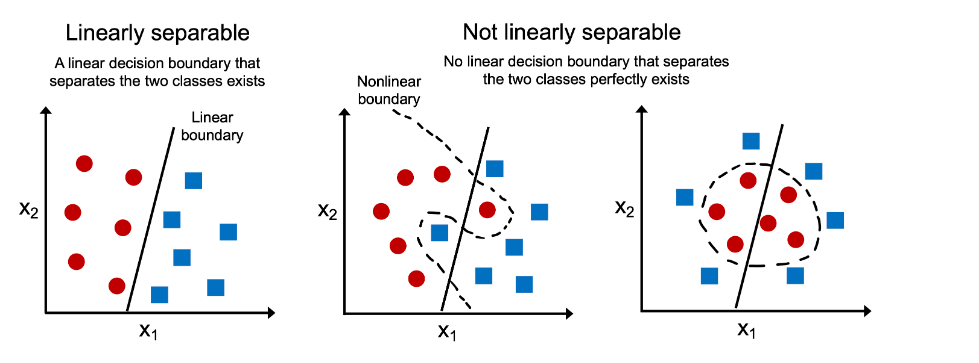

### ALl that being said, other than adding some more layers to the model and an additional ReLU to introduce some non-linearity, a lot of this code is genuinly copy and pasted from the SLP notebook, so you can really sit back and enjoy this exciting moment in your computer science career as you build your first true neural network

## **We have left off a lot of the explanations this time to encourage you to think through this code (it is still well annotated). Refer back to Notebook 5 if you are stuck!**

In [52]:
# Importing the Libraries

import torch
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt


## **Load the Dataset**

In [53]:
# Loading the Dataset
# We're using the wisconsin breast cancer dataset
# Our goal is to predict if the tumor is malignant or benign

# Load  dataset
breast_dataset = datasets.load_breast_cancer()

print(breast_dataset.feature_names)
print('number of features=',len(breast_dataset.feature_names))

# Import necessary libraries
# collections is a Python module implements specialized container datatypes 
# providing alternatives to Python’s general purpose built-in containers.
from collections import Counter 

# Load the target values from the breast cancer dataset
# These are the labels we want to predict: 0 for malignant and 1 for benign
# the data we imported earlier from sci kit learn is stored in a dictionary with the 
# diagnosis having the key 'target'. As such we can access the data using this line of code
target = breast_dataset['target']

# Count the occurrence of each class in the target data
# Counter creates a dictionary where keys are the unique elements in the list, and the values are their counts.
# This helps us understand the distribution of classes in our dataset
class_distribution = Counter(target)

# Print out the counts of each class
# This gives us a quick look at how many samples belong to each class.
print(f"Malignant: {class_distribution[0]}")
print(f"Benign: {class_distribution[1]}")

# Print the length (or size) of the dataset
# This tells us the total number of samples in our dataset
print(f"Total number of samples in the dataset: {len(target)}")


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
number of features= 30
Malignant: 212
Benign: 357
Total number of samples in the dataset: 569


## **Break up dataset into train and test**

In [54]:
# The 'data' attribute of the dataset contains the feature matrix, which we will use as inputs for our model. 
# We store this in the 'inputs' variable.
inputs = breast_dataset['data']

# The 'target' attribute of the dataset contains the labels, i.e., the correct answers we aim to predict (benin or malignant).
# These are our target outputs, which we store in the 'target_outputs' variable.
target_outputs = breast_dataset['target']

# To work with PyTorch, we need to convert our data from NumPy arrays to PyTorch tensors.
# PyTorch tensors are multidimensional matrices, similar to NumPy's ndarrays, but they can be used on GPUs.
# We also specify 'dtype=torch.float' to ensure the data type is float as the data contains decimals
input_tensors = torch.tensor(inputs, dtype=torch.float)

# We perform the same conversion for our target outputs. However, we also reshape the tensor to be two-dimensional, 
# where the second dimension (i.e., the number of columns) is 1. 
# This is done using the 'view' function.
# '-1' in the view function is used when you aren't sure about the dimension and you want PyTorch to calculate it for you.
# In essence, this makes the tensor of shape 569x1 because there are 569 data points 
target_output_tensors = torch.tensor(target_outputs, dtype=torch.float).view(-1, 1)

# Splitting the Dataset
#We split the dataset into training and test sets. This will help us to evaluate our model's performance later.
# This is the same line used in module 3 for the data science section
data_train, data_test, target_train, target_test = train_test_split(input_tensors, target_output_tensors, test_size=0.2, random_state=42)

## **Lets Update Our Model to be an MLP**

### We will still use ```torch.nn.Sequential``` from PyTorchto stack all our layers together
### The first layer is still the input linear layer with 30 inputs (due to the shape of the breast cancer data set), *however*, you will notice it now has 20 outputs. This makes 20 the size of our hidden layer. There is no steadfast rule for what the size(s) of hidden layers should be. It is a hyperparameter and needs tuned like everything else in your model.
### We also introduce a ReLU activation function after this the input layer via ```torch.nn.ReLU()```. This applies a non-linearity to the model
### The hidden layer is next, and we use the 20 inputs that we made as outputs from the first layer as inputs to this layer. Just like in the SLP, however, the output of this layer is ***1*** because we are interested in making a binary classifier
### And last but not least, we keep our handy sigmoid activation function in at the end to get a prediction of a benign or malignant lesion.

In [55]:
model = torch.nn.Sequential(
    torch.nn.Linear(30, 20), # torch.nn.Linear is a linear transformation (y = xA^T + b) 
                                              # with parameters (weights and biases).
                                              # This layer takes two arguments: the number of input features (30) 
                                              # and the number of hidden layer nodes (20)
    torch.nn.ReLU(), # add a ReLU activation function
    torch.nn.Linear(20, 1),  # 20 inputs from the hidden layer, one output node for binary classification
    torch.nn.Sigmoid() # We use the Sigmoid activation function, which squashes its input to a value between 0 and 1.
                       # This is appropriate for binary classification, as it allows us to interpret the output as a probability.
)

### Because this is still a binary classfication problem we can still use the binary cross entropy loss function, and we can stick with stochastic gradient descent as an optimizer. We kept the same low learning rate as this is still a pretty simple model in the grand scheme of things
### Both of these are hyperparameters that can be tweaked in order to optimize your model's performance! This is where AI becomes a little bit of an art as well as a science

In [56]:
# Defining the Loss Function and Optimizer
# We're using Binary Cross Entropy loss for our model and Stochastic Gradient Descent as our optimization algorithm.

# Loss and optimizer
loss_fn = torch.nn.BCELoss()                  # Binary Cross Entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)  # Setting a very low learning rate due to simplicity of model- want to take small steps down the 
                                                            # hill at the cost of potentially training longer


### We will use the same training code as for our SLP. This may take slightly longer to train as the hidden layers require more compute, but it should still be very fast

In [57]:
# Training the Model
# Finally, we train our model. We iterate over our data, compute the predicted outputs, calculate the loss, and update our model's parameters.
epochs = 30000 # define number of epichs to train for
losses = [] # define a list to keep track of the losses for future iterations
# Training loop
for epoch in range(epochs): # Train for number of epochs specified
    # Forward pass
    y_pred = model(data_train)     # Make predictions

    # Compute loss
    loss = loss_fn(y_pred, target_train)   # Calculate loss
    losses.append(loss.item()) # append the loss to our losses list for future graphing
    # Backward pass and optimization
    loss.backward()             # Compute gradients
    optimizer.step()            # Update model parameters

    # Zero out gradients for the next step
    optimizer.zero_grad()       # Clear gradients for next epoch

    # Print loss for every 20th epoch. This is strictly for monitoring the progress of the training procedure
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epoch 0, Loss: 0.890062689781189
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensi

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Now plot the data!

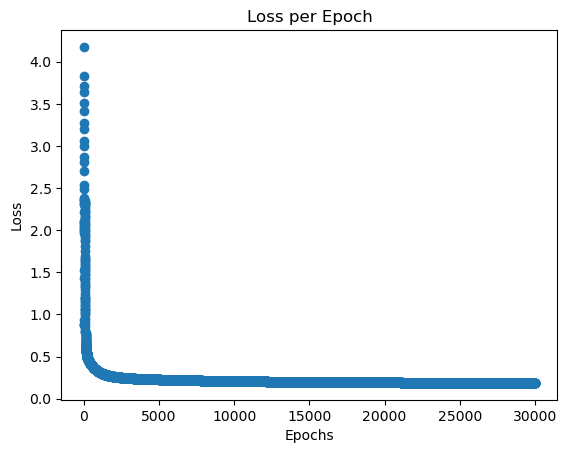

In [58]:
plt.figure() # Create a new figure

epochs_plot = [i for i in range(epochs)]
# Plot the losses
plt.scatter(epochs_plot, losses)

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')

# Display the plot
plt.show()

### And calculate accuracy!

In [59]:
# No gradient computation needed in evaluation phase
with torch.no_grad(): # This line sets the context for computation without tracking gradients. 
                      # We specify no gradient here because during model evaluation we don't want to update the model's parameters.
                      # We want to strictly assess how our trained model is doing

    y_pred = model(data_test) # This line feeds the test data to the model and computes the output (predictions). 
                              # Here, the model is not being trained, it's just making predictions on the test data.

    y_pred_round = y_pred.round() # The model's output is a probability value between 0 and 1. 
                                # We round off this value to get the predicted class (0 or 1).
                                # This means that if the output from the model is .5 or greater, it thought the data represented
                                # a benign fine needle aspiration, If < .5, it thought it was malignant. Remember how sigmoid activation 
                                # function gave a value between 0 and 1? This is when that becomes relevant!
    
    # Check how many predictions the model got right on the test set.
    correct_predictions = y_pred_round.eq(target_test).sum() # the .eq is a pyTorch move to compare how many elements in two (equal size) tensors 
                                                           # are the same. We want to see how many of our predicted values are the same as in our
                                                           # ground truth test set so we can calculate a percentage later

    total_test_cases = float(target_test.shape[0])  # Get the total number of test cases. by taking the shape of the test tensor


    # Calculate the accuracy by dividing the number of correct predictions by the total number of test cases.
    accuracy_fraction = correct_predictions / total_test_cases

    accuracy = accuracy_fraction.item()  # Convert the tensor to a standard Python number using .item




print(f'Accuracy: {accuracy*100:.2f}%') # This line prints the accuracy of the model as a percentage, formatted to 2 decimal places.

Accuracy: 95.61%


### And just like that we acheived ~96% accuracy, just by adding a hidden layer. It is incredible how two lines of code can result in a 5% increase with already very low margins of error. 

### Keep in mind, you always need to be weary of over and underfitting your data with your model. We are bringing it up, yet again, because it is extremely important and relevant.

### We encourage you to go back through this notebook and tweak the hyperparameters to see what happens. You can also change the loss function and optimizer if you are really feeling it.

### And if you are ***really*** feeling it, there is a leaderboard for this dataset on Kaggle. As of writing, many people have achieved 99% accuracy. It can be fun to try and replicate others work, but see if you cant improve it on your own!